In [1]:
## importing dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input = "In the town of Athy one Jeremy Lanigan\n Battered away til he hadnt a pound.\n His father died and made him a man again\n Left him a farm and ten acres of ground.\n He gave a grand party for friends and relations\n Who didnt forget him when come to the wall,\n And if youll but listen Ill make your eyes glisten\n Of the rows and the ructions of Lanigan’s Ball.\n Myself to be sure got free invitation,\n For all the nice girls and boys I might ask,\n And just in a minute both friends and relations\n Were dancing round merry as bees round a cask.\n Judy ODaly, that nice little milliner,\n She tipped me a wink for to give her a call,\n And I soon arrived with Peggy McGilligan\n Just in time for Lanigans Ball."

In [3]:
tokenizer = Tokenizer()
corpus = input.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
print(total_words)

97


In [4]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
print(input_sequences[:5])

[[6, 3], [6, 3, 17], [6, 3, 17, 4], [6, 3, 17, 4, 18], [6, 3, 17, 4, 18, 19]]


In [5]:
print(pad_sequences(input_sequences[:10]))

[[ 0  0  0  0  0  0  6  3]
 [ 0  0  0  0  0  6  3 17]
 [ 0  0  0  0  6  3 17  4]
 [ 0  0  0  6  3 17  4 18]
 [ 0  0  6  3 17  4 18 19]
 [ 0  6  3 17  4 18 19 20]
 [ 6  3 17  4 18 19 20 21]
 [ 0  0  0  0  0  0 22 23]
 [ 0  0  0  0  0 22 23 24]
 [ 0  0  0  0 22 23 24  9]]


In [6]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences)

[[ 0  0  0 ...  0  6  3]
 [ 0  0  0 ...  6  3 17]
 [ 0  0  0 ...  3 17  4]
 ...
 [ 0  0  0 ...  6 95  5]
 [ 0  0  0 ... 95  5 96]
 [ 0  0  0 ...  5 96 12]]


In [7]:
## spliting to featue and labels
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

In [8]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


## Creating the model

In [9]:
model = Sequential()
model.add(tf.keras.layers.Embedding(total_words,8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(xs, ys, epochs=1500, verbose=1)

Epoch 1/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.0086 - loss: 4.5749   
Epoch 2/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0171 - loss: 4.5724    
Epoch 3/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0600 - loss: 4.5700
Epoch 4/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0847 - loss: 4.5686
Epoch 5/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0730 - loss: 4.5665
Epoch 6/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0813 - loss: 4.5640
Epoch 7/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0742 - loss: 4.5618 
Epoch 8/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0722 - loss: 4.5580
Epoch 9/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.0867 - loss: 4.5546
Epoch 10/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0774 - loss: 4.5508
Epoch 11/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0859 - loss: 4.5462 
Epoch 12/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - 

In [12]:
## Creating function to display the graph
def plot_graph(fitted_history):
  epochs = range(1, len(fitted_history.history['accuracy']) + 1)
  plt.figure(figsize=(10,6))
  plt.plot(epochs, fitted_history.history['accuracy'])
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.show()

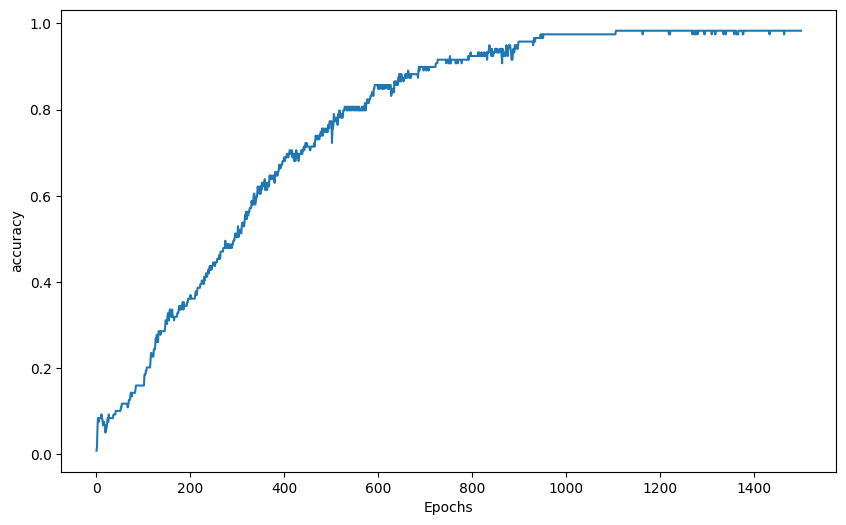

In [13]:
plot_graph(history)

## Predicting Text

In [14]:
seed_text = "in the town of athy"

In [15]:
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
predicted = np.argmax(model.predict(token_list), axis=-1)
print(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
[19]


In [16]:
for word, index in tokenizer.word_index.items():
  if index == predicted:
    print(word)
    break

one


## compounding predictions to generate text

In [17]:
seed_text = "sweet jeremy saw dublin"
next_words = 10
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
  predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word += word
      break
  seed_text += " " + output_word
print(seed_text)

sweet jeremy saw dublin the nice the of free one lanigan lanigan glisten glisten


## Extending the Dataset

In [18]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

--2025-07-26 17:01:48--  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt.2’

irish-lyrics-eof.tx 100%[===================>]  67.35K  --.-KB/s    in 0.1s    

2025-07-26 17:01:48 (605 KB/s) - ‘irish-lyrics-eof.txt.2’ saved [68970/68970]



In [19]:
data = open('/content/irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')

In [20]:
print(corpus)

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))

xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

## Changing model Architecture

In [ ]:
model = Sequential()
model.add(tf.keras.layers.Embedding(total_words,8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1, return_sequences="True")))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history1 = model.fit(xs, ys, epochs=400, verbose=1)

Epoch 1/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.0600 - loss: 7.1793
Epoch 2/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.0704 - loss: 6.3725
Epoch 3/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.0641 - loss: 6.2664
Epoch 4/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.0669 - loss: 6.1863
Epoch 5/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.0669 - loss: 6.1502
Epoch 6/400
377/377 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.0743 - loss: 6.0872
Epoch 7/400


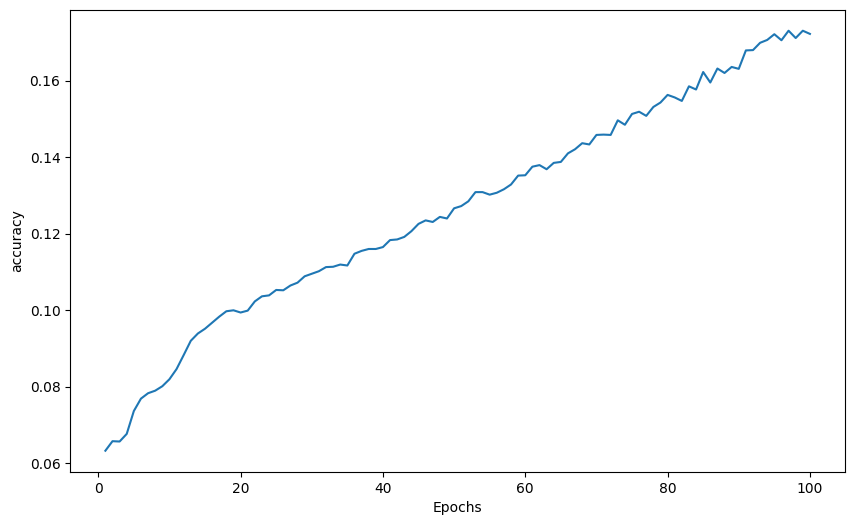

In [25]:
plot_graph(history1)